In [2]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV

In [3]:
# Cargar los datos
datos = pd.read_csv(r'C:\Users\52441\Remedial\Ridge\articulos_ml.csv', low_memory=False)

In [4]:
# Muestra de los primeros datos
print(datos)

                                                 Title  \
0    What is Machine Learning and how do we use it ...   
1     10 Companies Using Machine Learning in Cool Ways   
2    How Artificial Intelligence Is Revolutionizing...   
3    Dbrain and the Blockchain of Artificial Intell...   
4    Nasa finds entire solar system filled with eig...   
..                                                 ...   
156  [Log] 83: How Google Uses Machine Learning And...   
157  [Log] 84: Zuck Knows If You've Been Bad Or Goo...   
158  [Log] 85: Microsoft Improves Windows Phone Voi...   
159  [Log] 86: How Google's Acquisition Of DNNresea...   
160   [Log] 87: Google's Cloud Is Eating Apple's Lunch   

                                                   url  Word count  \
0    https://blog.signals.network/what-is-machine-l...        1888   
1                                                  NaN        1742   
2                                                  NaN         962   
3                      

In [5]:
# Descripción estadística de los datos
print(datos.describe())

        Word count  # of Links  # of comments  # Images video  Elapsed days  \
count   161.000000  161.000000     129.000000      161.000000    161.000000   
mean   1808.260870    9.739130       8.782946        3.670807     98.124224   
std    1141.919385   47.271625      13.142822        3.418290    114.337535   
min     250.000000    0.000000       0.000000        1.000000      1.000000   
25%     990.000000    3.000000       2.000000        1.000000     31.000000   
50%    1674.000000    5.000000       6.000000        3.000000     62.000000   
75%    2369.000000    7.000000      12.000000        5.000000    124.000000   
max    8401.000000  600.000000     104.000000       22.000000   1002.000000   

            # Shares  
count     161.000000  
mean    27948.347826  
std     43408.006839  
min         0.000000  
25%      2800.000000  
50%     16458.000000  
75%     35691.000000  
max    350000.000000  


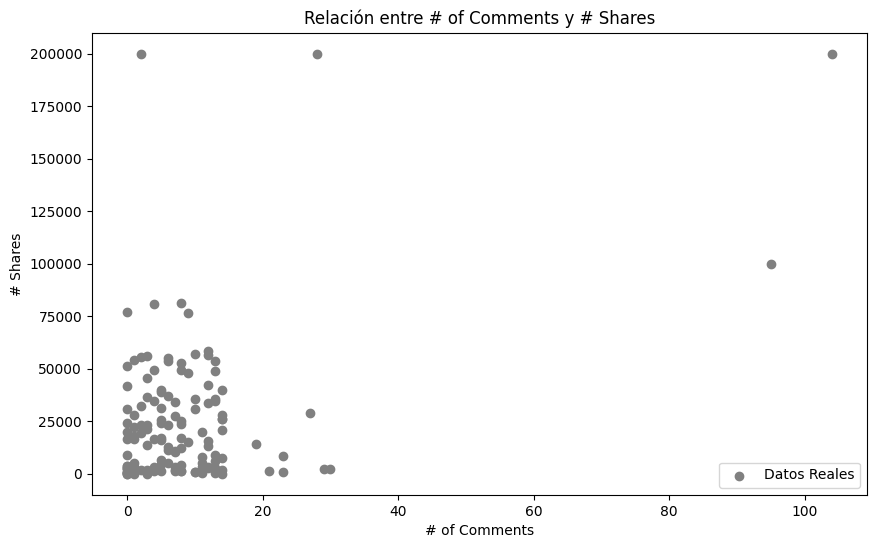

In [6]:
# Graficar la relación entre '# of comments' y '# Shares'
plt.figure(figsize=(10, 6))
plt.scatter(datos['# of comments'], datos['# Shares'], color='gray', label='Datos Reales')
plt.xlabel('# of Comments')
plt.ylabel('# Shares')
plt.title('Relación entre # of Comments y # Shares')
plt.legend()
plt.show()

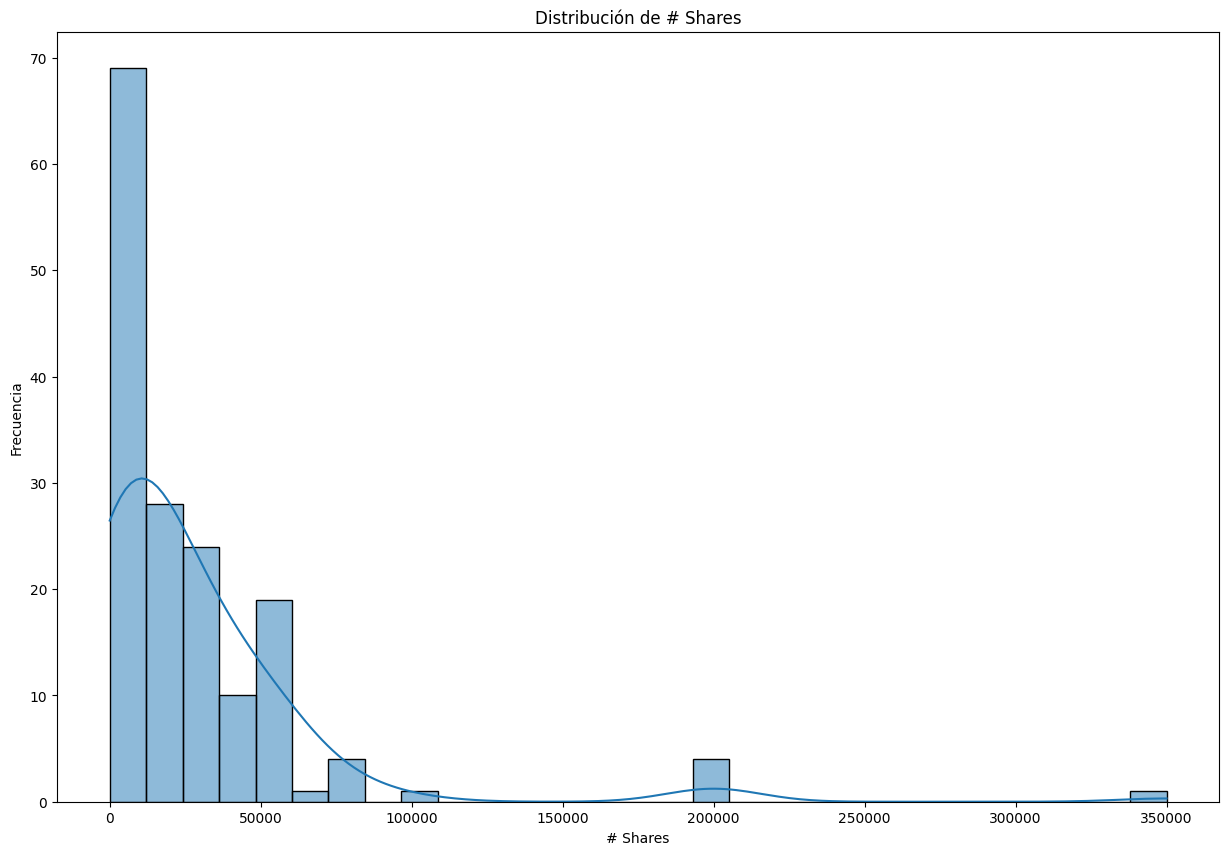

In [7]:
# Generar un histograma de los datos '# Shares'
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.histplot(datos['# Shares'], kde=True)
plt.title('Distribución de # Shares')
plt.xlabel('# Shares')
plt.ylabel('Frecuencia')
plt.show()


In [8]:
# Eliminar filas con valores nulos en las columnas relevantes
datos = datos.dropna(subset=['# of comments', '# Shares'])

# Asignamos '# of comments' como variable independiente (X) y '# Shares' como variable dependiente (y)
X = datos[['# of comments']].values  # Variable independiente
y = datos['# Shares'].values  # Variable dependiente

In [9]:
X

array([[  2.],
       [  0.],
       [104.],
       [ 28.],
       [  0.],
       [ 95.],
       [ 27.],
       [  1.],
       [  6.],
       [  0.],
       [  0.],
       [  0.],
       [ 19.],
       [  4.],
       [  4.],
       [ 23.],
       [ 12.],
       [  0.],
       [  0.],
       [  5.],
       [  0.],
       [  1.],
       [ 29.],
       [  0.],
       [  8.],
       [  5.],
       [ 13.],
       [  2.],
       [ 21.],
       [ 13.],
       [ 30.],
       [  5.],
       [  3.],
       [  0.],
       [  1.],
       [  7.],
       [  0.],
       [ 23.],
       [  0.],
       [  0.],
       [ 11.],
       [ 12.],
       [  7.],
       [ 10.],
       [  6.],
       [  0.],
       [ 10.],
       [ 12.],
       [  9.],
       [  0.],
       [  6.],
       [  1.],
       [  3.],
       [  9.],
       [  5.],
       [  1.],
       [  5.],
       [  3.],
       [ 12.],
       [ 12.],
       [  7.],
       [  6.],
       [ 10.],
       [ 14.],
       [  0.],
       [  8.],
       [  

In [10]:
y

array([200000,  42000, 200000, 200000,  77000, 100000,  29000,   3200,
        37000,  20000,   2400,   3800,  14000,   3000,   1500,   8400,
         3400,   2500,    757,   6400,   3600,     22,   2300,   2800,
         1300,   4500,    422,   2000,   1300,   2600,   2300,   1400,
         1800,    631,   1200,   1200,    196,    668,    424,      8,
          367,  42406,   1733,  35691,  11061,  51319,  30756,  58425,
        48060,      0,   4988,  27984,  45455,  76585,  24264,   5261,
        25548,      0,  56376,  13315,  27476,  55170,    871,  39767,
        16390,  23832,  12269,  10574,  24206,  13586,  81403,  21123,
        32248,   8001,  23288,  53720,  53449,  52712,  39681,  39091,
        28116,  25850,  20880,  17145,  57058,  19420,   3298,  31137,
         5153,  34515,   7260,      0,  23152,  30912,  34669,  12740,
        36707,   1177,  48927,  11055,  49421,  23018,  54198,    659,
        16641,  19828,  15047,  16160,  34065,  17124,  15512,   9085,
      

In [11]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
# empezamos entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Crear el modelo de regresión lineal (Ridge)
modelo = Ridge()

In [13]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

Ridge()

In [14]:
# Realizar las predicciones
y_pred = modelo.predict(X_test)

<Figure size 1600x1000 with 0 Axes>

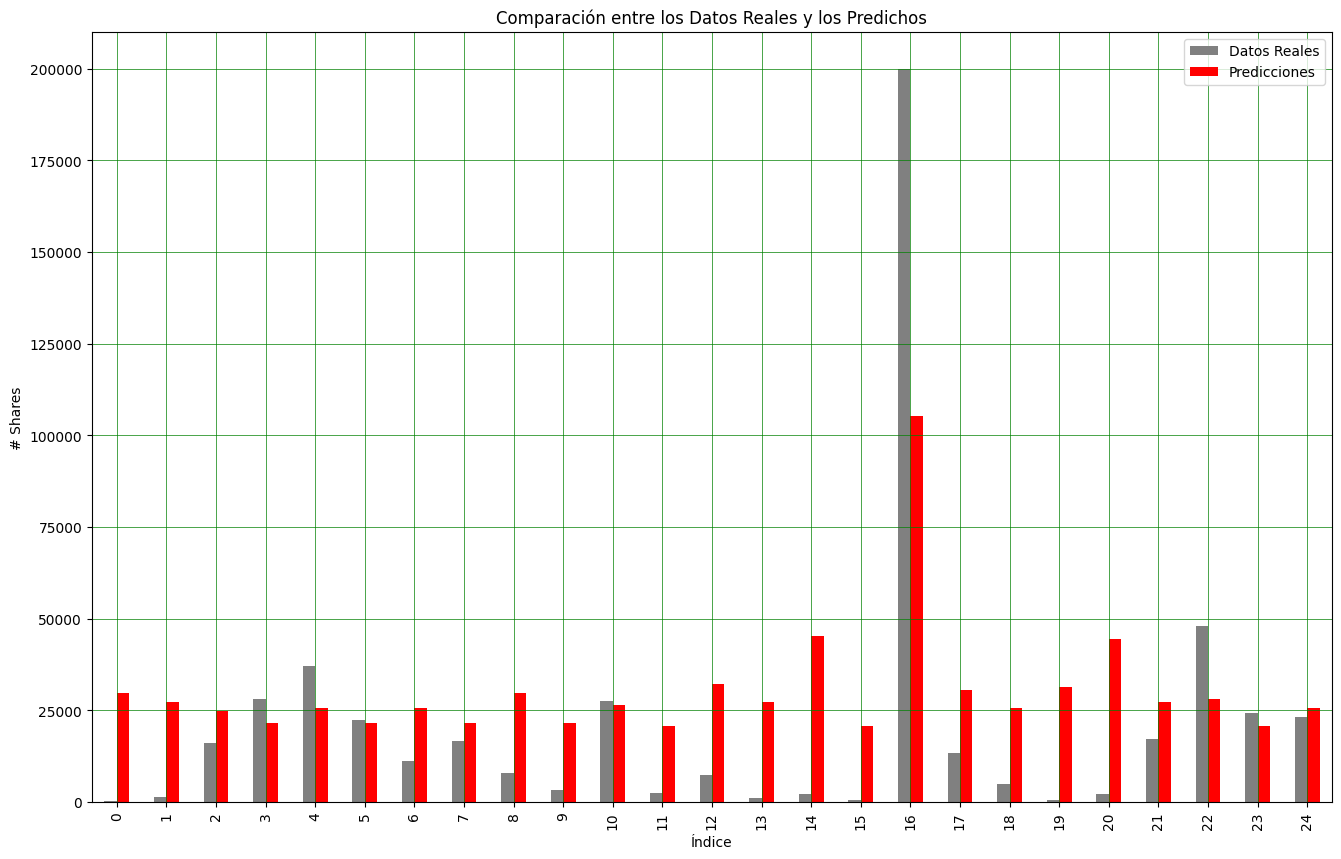

In [15]:
# Crear un DataFrame con los valores reales y predichos
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicho': y_pred.flatten()})

# Mostrar los primeros 25 valores
datos3 = datos2.head(25)

# Graficar la comparación en un gráfico de barras
plt.figure(figsize=(16,10))
datos3.plot(kind='bar', figsize=(16, 10), color=['gray', 'red'])

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('# Shares')
plt.title('Comparación entre los Datos Reales y los Predichos')

# Mostrar la leyenda
plt.legend(['Datos Reales', 'Predicciones'])

# Mostrar las cuadrículas
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Mostrar el gráfico
plt.show()

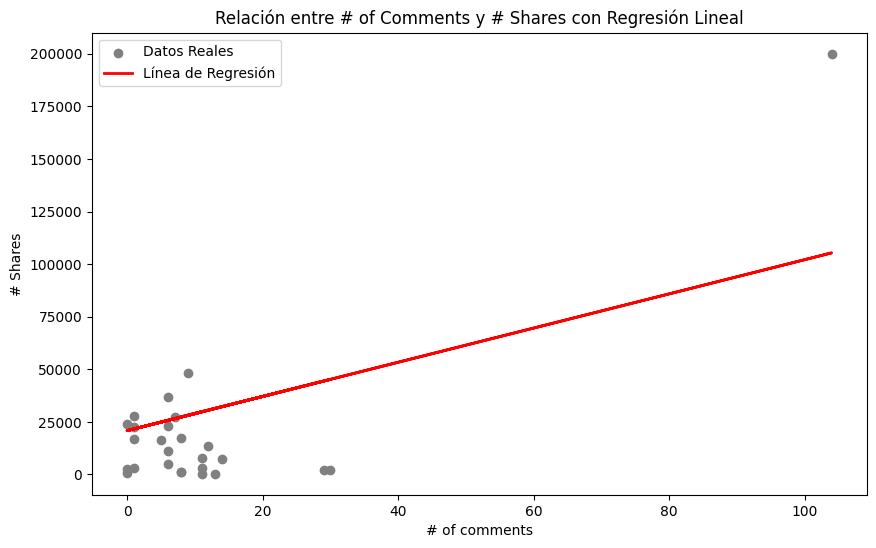

In [17]:
# Graficar la relación entre 'Shares' y 'comments', con la línea de regresión
plt.figure(figsize=(10, 6))

# Graficar los puntos reales
plt.scatter(X_test, y_test, color='gray', label='Datos Reales')

# Graficar la línea de regresión
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

# Etiquetas y título
plt.xlabel('# of comments')
plt.ylabel('# Shares')
plt.title('Relación entre # of Comments y # Shares con Regresión Lineal')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [24]:
# Evaluar el modelo
print('Error Absoluto Medio:', mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio:', mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de Determinación R²:', modelo.score(X_test, y_test))

# Imprimir el coeficiente de determinación R² con los datos reales y el nuevo modelo
print("Coeficiente de determinación R2 (Con todos los datos): ", modelo.score(X, y))

Error Absoluto Medio: 20939.823587602215
Error Cuadrático Medio: 784120230.965928
Raíz del Error Cuadrático Medio: 28002.146899227708
Coeficiente de Determinación R²: 0.4587532464376951
Coeficiente de determinación R2 (Con todos los datos):  0.17143807908653308


In [25]:
# Definir el espacio de búsqueda para la optimización
space = dict()
space['alpha'] = loguniform(1e-10, 100)
space['fit_intercept'] = [True, False]
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']


In [26]:
# Definir la búsqueda con validación cruzada
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = RandomizedSearchCV(modelo, space, n_iter=10, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [27]:
# Ejecutar la búsqueda
result = search.fit(X, y)

In [28]:
# Mostrar los mejores resultados de la búsqueda
print('Mejor puntuación:', result.best_score_)
print('Mejores Hiperparámetros:', result.best_params_)

Mejor puntuación: -21729.895555218518
Mejores Hiperparámetros: {'alpha': np.float64(1.0723441152701025e-05), 'fit_intercept': True, 'solver': 'svd'}


In [34]:
# Optimizar el modelo con los hiperparámetros obtenidos
modelo = Ridge(fit_intercept=result.best_params_['fit_intercept'], 
               solver=result.best_params_['solver'], 
               alpha=result.best_params_['alpha'])

In [30]:
# Re-entrenar el modelo con los mejores parámetros
modelo.fit(X_train, y_train)

Ridge(alpha=np.float64(1.0723441152701025e-05), solver='svd')

In [31]:
# Realizar las predicciones con el modelo optimizado
y_pred = modelo.predict(X_test)

In [32]:
# Recalcular el Error Absoluto Medio con el modelo optimizado
print('Nuevo Error Absoluto Medio:', mean_absolute_error(y_test, y_pred))

# Recalcular el Coeficiente de Determinación R² con el modelo optimizado
print('Nuevo Coeficiente de Determinación R2:', modelo.score(X_test, y_test))
# Imprimir el coeficiente de determinación R² con los datos reales y el nuevo modelo
print("Coeficiente de determinación R2 (Con todos los datos): ", modelo.score(X, y))

Nuevo Error Absoluto Medio: 20939.70401314506
Nuevo Coeficiente de Determinación R2: 0.4587800003631114
Coeficiente de determinación R2 (Con todos los datos):  0.17144472707516056


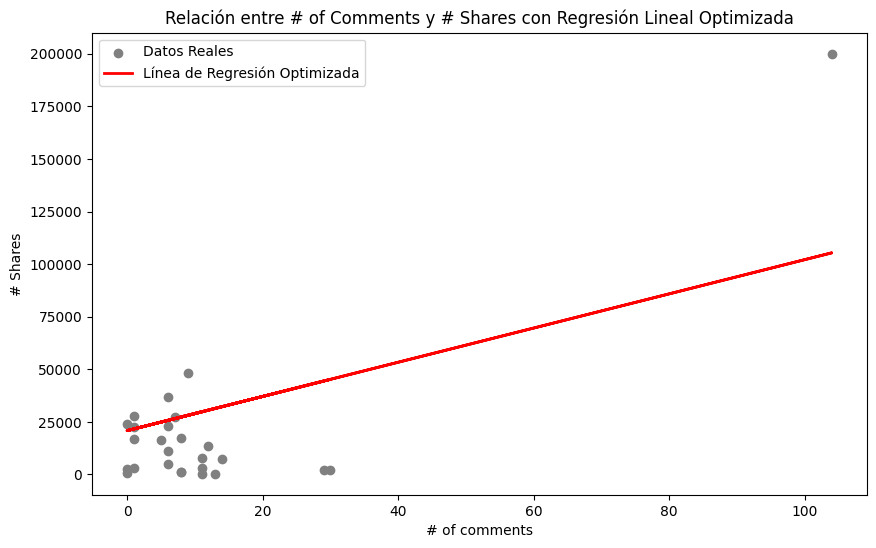

In [33]:
# Graficar la relación entre los valores reales y los predichos
plt.figure(figsize=(10, 6))

# Graficar los puntos reales
plt.scatter(X_test, y_test, color='gray', label='Datos Reales')

# Graficar la línea de regresión optimizada
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión Optimizada')

# Etiquetas y título
plt.xlabel('# of comments')
plt.ylabel('# Shares')
plt.title('Relación entre # of Comments y # Shares con Regresión Lineal Optimizada')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()